# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
url_weather="http://api.openweathermap.org/data/2.5/weather?"
url=f"{url_weather}appid={weather_api_key}&q={city}"

response=requests.get(url)
data=response.json()
data

{'coord': {'lon': 98.7792, 'lat': 1.7427},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 303.7,
  'feels_like': 306.06,
  'temp_min': 303.7,
  'temp_max': 303.7,
  'pressure': 1012,
  'humidity': 58,
  'sea_level': 1012,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 2.84, 'deg': 240},
 'clouds': {'all': 91},
 'dt': 1615437217,
 'sys': {'country': 'ID', 'sunrise': 1615419131, 'sunset': 1615462675},
 'timezone': 25200,
 'id': 1213855,
 'name': 'Sibolga',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#checking for the URL query

count_city=1

city_data=[]
coord_lat=[]
coord_lon=[]
main_max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
dt=[]

for city in cities:
    
    #retrive url and request the json file
    url_weather="http://api.openweathermap.org/data/2.5/weather?"
    query_url=f"{url_weather}appid={weather_api_key}&q={city}"
    weather_response=requests.get(query_url)
    weather_json=weather_response.json()
    
    #run loop on all cities with data needed.
    try:
        
        coord_lat.append(weather_json['coord']['lat'])
        coord_lon.append(weather_json['coord']['lon'])
        main_max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])
        city_data.append(city)
        print(f"Processing Record {count_city}|{city}")
    except:
         print(f'City not found. Skipping...{city}')
            
    count_city+=1

    

Processing Record 1|qaqortoq
Processing Record 2|barrow
Processing Record 3|geraldton
Processing Record 4|rikitea
Processing Record 5|itaueira
Processing Record 6|busselton
Processing Record 7|souillac
Processing Record 8|bealanana
City not found. Skipping...taolanaro
Processing Record 10|upernavik
Processing Record 11|cayenne
Processing Record 12|padang
Processing Record 13|pitiquito
Processing Record 14|arraial do cabo
Processing Record 15|rio bueno
Processing Record 16|punta arenas
Processing Record 17|puebloviejo
Processing Record 18|kruisfontein
City not found. Skipping...guajara-mirim
Processing Record 20|srivardhan
Processing Record 21|port alfred
Processing Record 22|acarau
Processing Record 23|sao raimundo nonato
Processing Record 24|fenoarivo
Processing Record 25|zyryanka
Processing Record 26|adre
Processing Record 27|bambous virieux
Processing Record 28|coihaique
Processing Record 29|henties bay
Processing Record 30|hobart
Processing Record 31|konevo
Processing Record 32|bat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#!mkdir weather_CSV

city_dic={'City':city_data,
          'Lat':coord_lat,
          'lng':coord_lon,
          'Max Temp':main_max_temp,
          'Humidity':humidity,
          'Cloudiness':cloudiness,
          'Wind Speed':wind_speed,
          'Country':country,
          'Date':dt}
city_data_df=pd.DataFrame(city_dic)
city_data_df

#export the city data into .CSV
city_data_df.to_csv('weather_CSV/weather_data.csv')

#display the data frame.
city_data_df

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,268.15,80,75,2.06,GL,1615437218
1,barrow,71.2906,-156.7887,250.15,70,20,5.66,US,1615437219
2,geraldton,-28.7667,114.6000,303.15,54,31,6.69,AU,1615437219
3,rikitea,-23.1203,-134.9692,299.40,75,47,8.58,PF,1615437219
4,itaueira,-7.6033,-43.0256,295.47,87,34,1.14,BR,1615437219
...,...,...,...,...,...,...,...,...,...
552,nishihara,26.1842,127.7558,298.15,46,20,6.17,JP,1615437389
553,huron,41.1501,-82.5499,289.82,41,100,3.13,US,1615437389
554,puerto lempira,15.2667,-83.7667,297.14,87,0,3.42,HN,1615437389
555,goroka,-6.0834,145.3873,294.97,78,93,1.58,PG,1615437390


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#sortting all the values under humidity 
humidity_df=city_data_df.sort_values('Humidity',ascending=False)
humidity_df
#This step needs to be skiped since there is no values over 100 under humidity.

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
86,airai,-8.9266,125.4092,293.87,100,78,0.29,TL,1615437244
249,ancud,-41.8697,-73.8203,282.59,100,20,2.06,CL,1615437292
189,praia da vitoria,38.7333,-27.0667,287.04,100,90,4.88,PT,1615437274
244,conil,44.9673,3.7177,274.59,100,100,2.48,FR,1615437291
236,talcahuano,-36.7167,-73.1167,288.15,100,90,2.57,CL,1615437288
...,...,...,...,...,...,...,...,...,...
263,chikhli,20.3500,76.2500,306.57,14,22,6.91,IN,1615437262
289,say,13.1007,2.3689,301.15,14,0,3.60,NE,1615437306
426,usta muhammad,28.1794,68.0445,302.78,14,0,2.63,PK,1615437348
461,nizwa,22.9333,57.5333,302.61,14,0,1.14,OM,1615437361


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [25]:
# def imganalisys(columnX,columnY):
#     plt.scatter(city_data_df[""], city_data_df["columnY"], marker="o", s=15)
#     plt.xlabel("Latitude")
#     plt.grid(True)
#     return


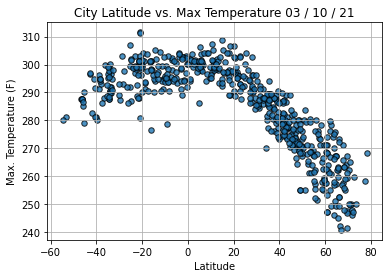

In [55]:
#!mkdir figure

#imganalisys('Lat','Max Temp')

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, s=30)
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m / %d / %y")}')
plt.ylabel("Max. Temperature (F)")

plt.grid(True)
plt.savefig("figure/plotLatitudeVsTemperaturePlot.png")

plt.show()

## Latitude vs. Humidity Plot

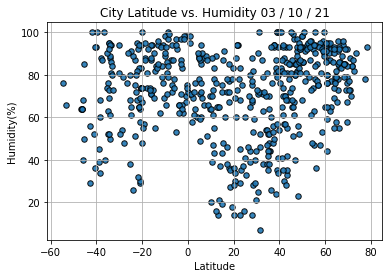

In [58]:
#imganalisys('Lat','Humidity')
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)
plt.xlabel("Latitude")
plt.title(f'City Latitude vs. Humidity {time.strftime("%m / %d / %y")}')
plt.ylabel("Humidity(%)")

plt.grid(True)
plt.savefig("figure/plotLatitudeVsHumidityPlot.png")

plt.show()

## Latitude vs. Cloudiness Plot

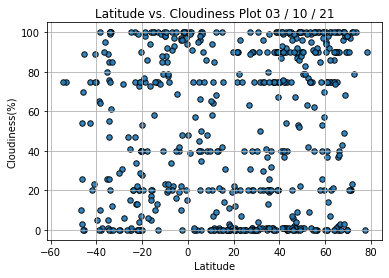

In [59]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)

plt.title(f'Latitude vs. Cloudiness Plot {time.strftime("%m / %d / %y")}')
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsCloudinessPlot.png")

plt.show()

## Latitude vs. Wind Speed Plot

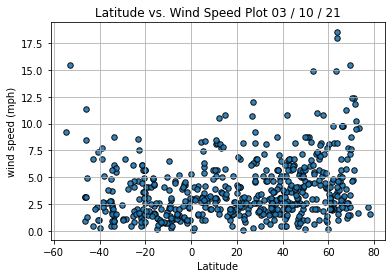

In [60]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, s=30)

plt.title(f'Latitude vs. Wind Speed Plot {time.strftime("%m / %d / %y")}')
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsWindSpeedPlot.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression